# EXPERIMENT 1

## Name - Ishika Kesarwani
## Sap ID - 500076373
## Course - AIML B3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sal= pd.read_csv('Salaries.csv')
sal.head(3)

/Users/ishikakesarwani/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [3]:
# check for missing data
sal.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [4]:
# drop notes and Status column
sal.drop(['Notes','Status'],axis=1,inplace=True)

In [5]:
sal.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [6]:
# drop benefit column
sal.drop(['Benefits'],axis=1,inplace=True)

In [7]:
# remove rows with missing data
sal.dropna(inplace=True)

In [8]:
sal.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [9]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,326373.19,2011,San Francisco


In [10]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148049 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148049 non-null  int64  
 1   EmployeeName      148049 non-null  object 
 2   JobTitle          148049 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148049 non-null  object 
 5   OtherPay          148049 non-null  object 
 6   TotalPay          148049 non-null  float64
 7   TotalPayBenefits  148049 non-null  float64
 8   Year              148049 non-null  int64  
 9   Agency            148049 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 12.4+ MB


In [13]:
list1 =['BasePay','OvertimePay' , 'OtherPay']
for i in list1:
    sal[i] = pd.to_numeric(sal[i], errors='coerce')

In [14]:
# find mean values
sal.mean()

<ipython-input-14-37a81ae5f861>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sal.mean()


Id                  74194.691744
BasePay             66325.448841
OvertimePay          5086.740800
OtherPay             3645.661408
TotalPay            75055.823129
TotalPayBenefits    94035.644336
Year                 2012.520692
dtype: float64

<AxesSubplot:xlabel='Year', ylabel='TotalPayBenefits'>

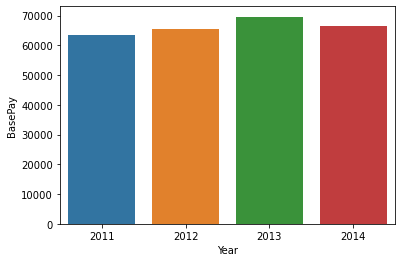

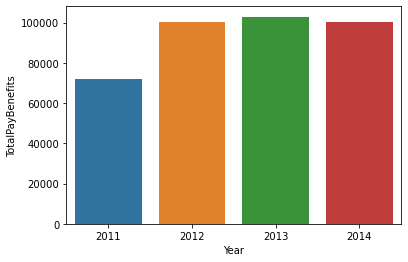

In [12]:
# compare salaries over time (comparing the base pays and total pays with benefits)
salary_over_timee = sal.groupby('Year').mean()
salary_over_timee.reset_index(inplace=True)
sns.barplot(x = 'Year', y='BasePay' , data = salary_over_timee)
plt.figure()
sns.barplot(x = 'Year', y='TotalPayBenefits' , data = salary_over_timee)